# Jupiter Notebook for measuring the penetration behavior of water through paper
Step by step code presentation

---
## Authors
Anne-Marie Kröher,Luisa Schueller, Peter Krutzke, Coding support by Robert Unger

---
## Init
Import all classes and functions

In [7]:
# Makes plotting beauty
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)
import seaborn as sns 
sns.set(style="darkgrid")

import numpy as np

# Logging
from logger import get_logger, logging

# Image batch processing functions
from image import Images, image_read_gray, image_write, image_to_gray, bgr_to_rgb

# Interval capturing and grey scaling
from capture import Capture

# Transformer functions
import transformer as tf



---
## Create Image handle
Images class offers batch processing functions and caches images. You can customise the params.

In [8]:
Image_handler = Images(filename = "DVM22_Penetration_", path= "../data/")

---
## Capturing images from camera
Define your intervals as a list of tuples(duration, interval).
You can also set Debug if needed.

If you wish to convert every image to gray scale, set convert param to True. Of course you can also perform the conversion process afterwards

In [9]:
# set log level to debug
log = get_logger("capture")
# Uncomment if you want logging
#log.setLevel(logging.DEBUG)

# Define intervals
intervals = [(100, 100),(1000, 100)]

# We use the Image_handler from above
# Setting the path param here is useless and duplicate
c = Capture(intervals, path="../data/", image_handler=Image_handler)
c.run_capture(convert=True) # Want to convert images to gray scale?

# Uncomment if you wish to batch convert images to gray scale
#c.run_convert(replace=False) # Want to replace orginal images?

---
## Fast Fourier Transformation
Load image and transform. Example on one image. There is also a batch process.
For the example demo we use our dummy image lena.png
For our proper use case we can load the images directly from our image cache.

IMPORTANT! We need to load image as 2D array. When reading image as gray scale, , this happens automatically.

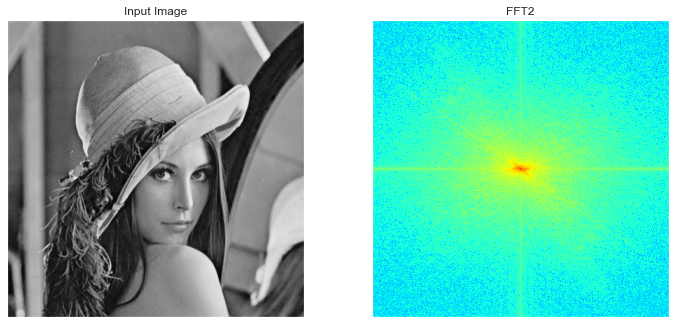

In [4]:
img_orginal = image_read_gray("../example/lena.png") # Need to load as gray scale 2D image

# fft2 transformation
img_fft2 = tf.fft_transformer(img_orginal)

plt.subplot(221), plt.imshow(img_orginal, cmap="gray")
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_fft2, cmap="jet")
plt.title('FFT2'), plt.xticks([]), plt.yticks([])
plt.show()

---
## Radial Profile
Calculating radial profile and plot. For this step we used the processed img_fft2 variable

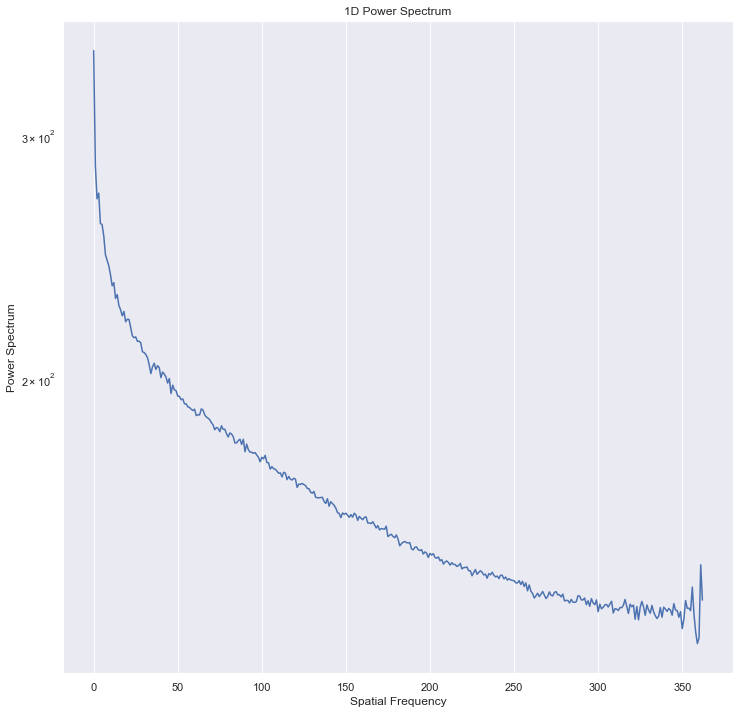

In [5]:
radial = tf.calc_radial_profile(img_fft2) # img_fft2 from previous step
plt.subplot(111), plt.semilogy(radial)
plt.title('1D Power Spectrum')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power Spectrum')
plt.show()

---
## Gaussian?

In [6]:
from scipy.optimize import curve_fit

length_x = np.shape(radial)
xdata = np.linspace(0, 1000, num=length_x[0], retstep=False)
ydata = radial

def gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

#def gaussian(x, mu, sig):
#    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

init_vals= [10e12, 350, 40]
best_vals, covar = curve_fit(gaussian, xdata, ydata, p0= init_vals, maxfev=1000) # , p0= init_vals

print(f"Best Values: {best_vals}")

#plt.plot(xdata, gaussian(xdata, *best_vals))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.